In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.ensemble import RandomForestClassifier


import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

target = 'bot'
IDcol = 'id'

df = pd.read_csv('training_data_2_csv_UTF.csv')

def verified(df):
    if df['verified'] == 'TRUE':
        return 1
    else:
        return 0

def default_profile(df):
    if df['default_profile'] == 'TRUE':
        return 1
    else:
        return 0

def default_profile_image(df):
    if pd.notnull(df['has_extended_profile']) and df['has_extended_profile'] == 'TRUE':
        return 1
    else:
        return 0

def extended_profile(df):
    if df['default_profile_image'] == 'TRUE':
        return 1
    else:
        return 0

def name_bot(df):
    bot_count = 0
    if pd.notnull(df['screen_name']):
        for words in df['screen_name'].lower():
            if words == 'bot':
                bot_count = bot_count +1
            else:
                bot_count = bot_count
        return bot_count
    else:
        return 0

def desc_bot(df):
    bot_count = 0
    if pd.notnull(df['description']):
        for words in df['description'].lower():
            if words == 'bot' or words == 'posts' or words == 'robot' or words == 'reposts' or words == 'intelligent' or words == 'personality':
                bot_count = bot_count +1
            else:
                bot_count = bot_count
        return bot_count
    else:
        return 0

def listed_count(df):
    if df['listed_count'] == 'None':
        return 0
    else:
        return df['listed_count']

def friends_count(df):
    if df['friends_count'] == 'None':
        return 0
    else:
        return df['friends_count']

def followers(df):
    if df['followers_count'] == 'None':
        return 0
    else:
        return df['followers_count']

def favorites_count(df):
    if df['favourites_count'] == "None":
        return 0
    else:
        return df['favourites_count']
    
df['verified'] = df.apply(verified,axis=1)
df['default_profile_image'] = df.apply(default_profile_image,axis=1)
df['default_profile'] = df.apply(default_profile,axis=1)
df['favourites_count'] = df.apply(favorites_count,axis=1)
df['name'] = df.apply(name_bot,axis=1)
df['description'] = df.apply(desc_bot,axis=1)
#df = df[['followers_count','friends_count','listedcount','verified','statuses_count','default_profile','default_profile_image','name','desc','favourites_count','bot']]
df = df[['followers_count','friends_count','verified','statuses_count','default_profile','default_profile_image','name','description','favourites_count','bot']]
#print(df)


In [28]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['bot'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['bot'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['bot'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['bot'], dtrain_predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9156
AUC Score (Train): 0.974357
CV Score : Mean - 0.9498556 | Std - 0.01181819 | Min - 0.9340524 | Max - 0.9611232


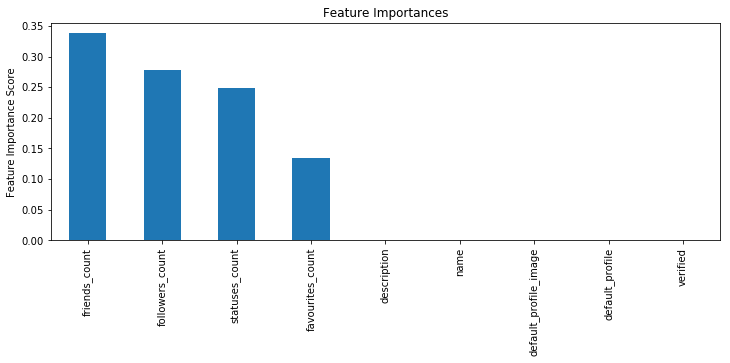

In [29]:
#gradient boosting
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df, predictors)


Model Report
Accuracy : 0.9886
AUC Score (Train): 0.999662
CV Score : Mean - 0.9331602 | Std - 0.01741443 | Min - 0.9060927 | Max - 0.9489343


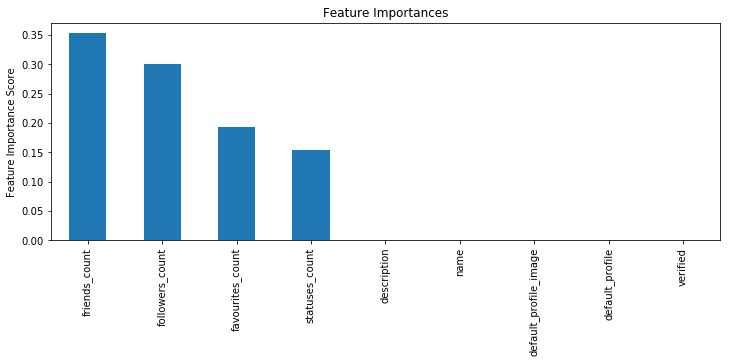

In [30]:
#random forest
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = RandomForestClassifier(random_state=10)
modelfit(gbm0, df, predictors)


Model Report
Accuracy : 0.9989
AUC Score (Train): 0.999998
CV Score : Mean - 0.8390708 | Std - 0.0187063 | Min - 0.8098934 | Max - 0.8621813


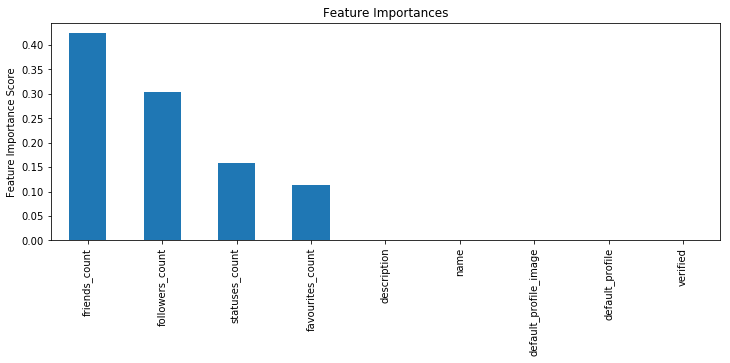

In [33]:
#decision tree
from sklearn import tree

#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in [target, IDcol]]
gbm0 = tree.DecisionTreeClassifier()
modelfit(gbm0, df, predictors)